In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car_data = pd.read_csv('cardekho_dataset.csv')

## Exploratory Data Analysis (EDA) - Descriptive Statistics

In [3]:
car_data.head()  
# Note: The first column is an index and not relevant for predictions.  
# The second column appears redundant and may be dropped if unnecessary.  

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
# Remove unnecessary columns: 'Unnamed: 0' (index) and 'car_name' (non-predictive)  
car_data = car_data.drop(['Unnamed: 0', 'car_name'], axis=1)  

In [5]:
car_data.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
car_data.shape

(15411, 12)

In [7]:
car_data.info()
# Note: Dataset contains no missing values (NaN)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              15411 non-null  object 
 1   model              15411 non-null  object 
 2   vehicle_age        15411 non-null  int64  
 3   km_driven          15411 non-null  int64  
 4   seller_type        15411 non-null  object 
 5   fuel_type          15411 non-null  object 
 6   transmission_type  15411 non-null  object 
 7   mileage            15411 non-null  float64
 8   engine             15411 non-null  int64  
 9   max_power          15411 non-null  float64
 10  seats              15411 non-null  int64  
 11  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.4+ MB


In [8]:
car_data.describe()
# Note: First 5 features and target show right skew (75th %ile vs max disparity)

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


## Distributional Analysis & Outlier Detection

Text(0.5, 1.0, 'Vehicle Age Distribution')

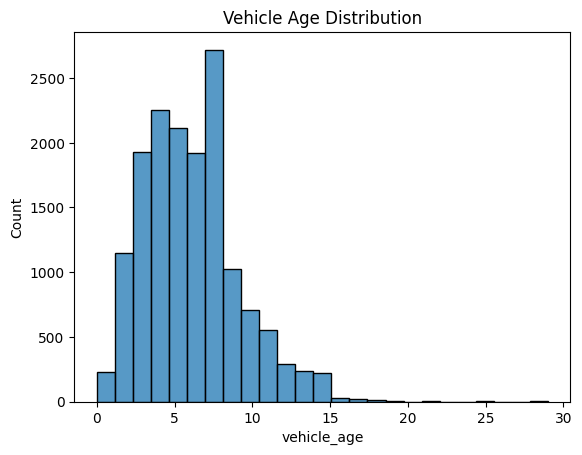

In [9]:
# Visualize feature distributions to assess skewness
sns.histplot(data=car_data,
             x='vehicle_age',
             bins=25)
plt.title('Vehicle Age Distribution')

# Observation: Right-skewed distribution

In [10]:
# Moderate right skew detected - would apply sqrt transformation
car_data['vehicle_age'].skew()

np.float64(0.8337120214365826)

Text(0.5, 1.0, 'Distribution of Kilometers Driven')

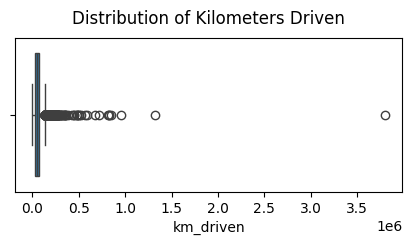

In [11]:
plt.figure(figsize=(5, 2))
sns.boxplot(data=car_data, x='km_driven')
plt.title("Distribution of Kilometers Driven", pad=10) 

In [12]:
car_data['km_driven'].skew()
# Extreme skew detected - capping outliers (potential data entry errors)

np.float64(28.172710872110212)

Text(0.5, 1.0, 'Distribution of Milage')

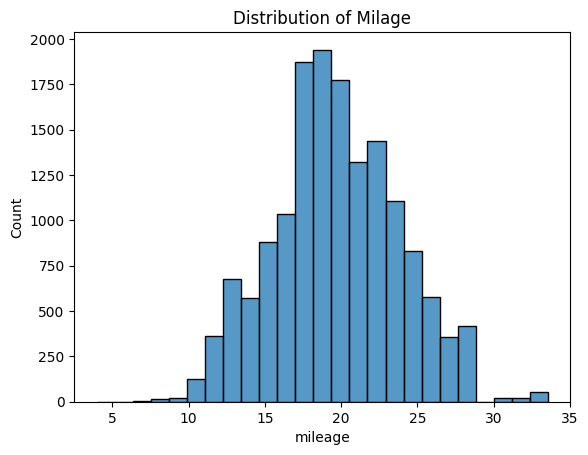

In [13]:
sns.histplot(data = car_data,
             x = 'mileage',
             bins = 25)
plt.title('Distribution of Milage')
# Normally distributed - no log transform or capping needed

In [14]:
car_data['mileage'].skew()

np.float64(0.10496103450949668)

np.float64(1.666466626105951)

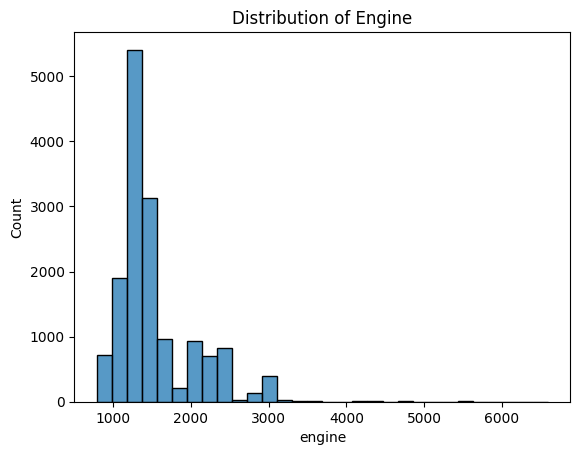

In [15]:
sns.histplot(data = car_data,
             x = 'engine',
             bins = 30)
plt.title("Distribution of Engine")
car_data['engine'].skew()
# Right-skewed distribution - log transform recommended

In [16]:
car_data['engine'].skew()

np.float64(1.666466626105951)

Text(0.5, 1.0, 'Distribution of Max Power')

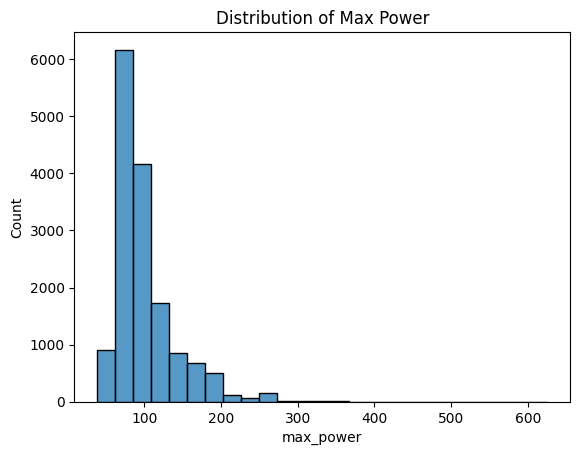

In [17]:
sns.histplot(data = car_data,
             x = 'max_power',
             bins = 25)
plt.title('Distribution of Max Power')

In [18]:
# Right-skewed distribution - log transform recommended
car_data['max_power'].skew()

np.float64(2.485129431649049)

Text(0.5, 1.0, 'Distribution of Selling_Price')

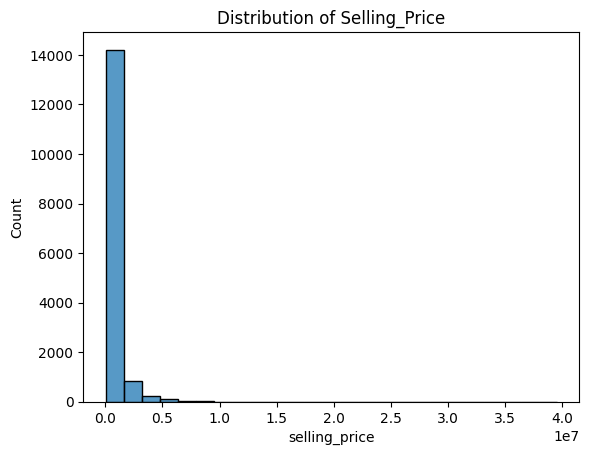

In [19]:
sns.histplot(data = car_data,
             x = 'selling_price',
             bins = 25)
plt.title('Distribution of Selling_Price')

<Axes: xlabel='selling_price'>

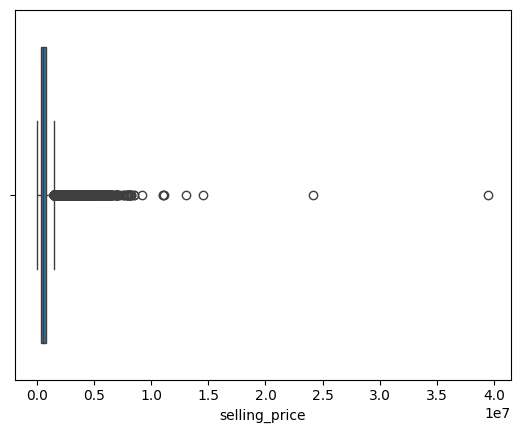

In [20]:
sns.boxplot(car_data, x = 'selling_price')

In [21]:
car_data['selling_price'].skew()
# Extremely right-skewed distribution

np.float64(10.047047978435213)

Text(0.5, 1.0, 'Distribution of Seller Type')

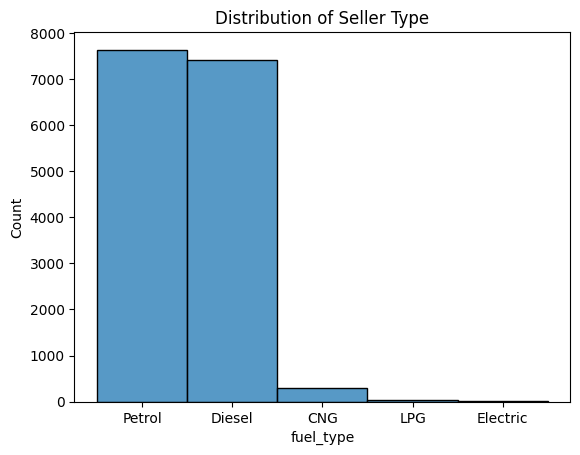

In [22]:
# Fuel type distribution shows petrol/diesel dominance
sns.histplot(data=car_data,
            x='fuel_type',
            bins=5)
plt.title('Distribution of Seller Type')
#Observation: CNG/LPG/Electric vehicles exhibit significantly low frequency 

Text(0.5, 1.0, 'Seller Type Distribution')

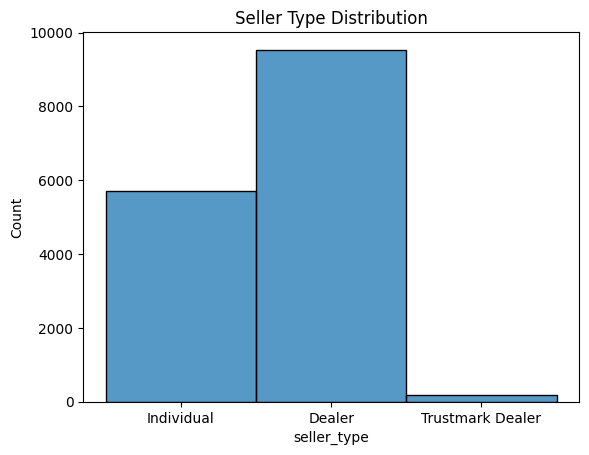

In [23]:
sns.histplot(data = car_data,
            x = 'seller_type',
            bins =3)
plt.title('Seller Type Distribution')
#Observation: Trustmark Dealer has significantly low freq - consider dropping it if correlation is also low

## Feature Encoding for Non-Numeric Data

In [24]:
car_data.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [25]:
car_data['brand'].unique()
#Consider Target Encoding

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

In [26]:
car_data['model'].unique() 

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

### Why Target Encoding Instead of One-Hot or Frequency Encoding?

Features `brand` and `model` in our dataset have a very high number of unique values (high cardinality).  
- **One-Hot Encoding** is not feasible here, as it would explode the feature space with hundreds of new columns, making the model inefficient and prone to overfitting.  
- **Frequency Encoding** is also avoided because it does not capture any meaningful relationship between the category and the target variable.  

=> **Target Encoding** is preferred in this case because it maps each category to the average target value for that category, preserving the relationship between the feature and the target while keeping the feature space compact.


In [27]:
car_data['seller_type'].unique() #one-hot

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [28]:
car_data['fuel_type'].unique() #one-hot

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [29]:
car_data['transmission_type'].unique() #label

array(['Manual', 'Automatic'], dtype=object)

In [30]:
#label encoding ordincal data
dic_1 = {"Manual":0, "Automatic":1}
car_data['transmission_type'] = car_data['transmission_type'].map(dic_1)

In [34]:
car_data.head()

,brand,model,vehicle_age,km_driven,transmission_type,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol
0,Maruti,Alto,9,120000,0,19.70,796,46.30,5,120000,0,1,0,0,0,0,0,1
1,Hyundai,Grand,5,20000,0,18.90,1197,82.00,5,550000,0,1,0,0,0,0,0,1
2,Hyundai,i20,11,60000,0,17.00,1197,80.00,5,215000,0,1,0,0,0,0,0,1
3,Maruti,Alto,9,37000,0,20.92,998,67.10,5,226000,0,1,0,0,0,0,0,1
4,Ford,Ecosport,6,30000,0,22.77,1498,98.59,5,570000,1,0,0,0,1,0,0,0


In [32]:
#one hot encoding
nominal_col = ['seller_type', 'fuel_type'] 
car_data = pd.get_dummies(car_data, columns = nominal_col, drop_first = False, dtype = int)

In [35]:
car_data.head()

,brand,model,vehicle_age,km_driven,transmission_type,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol
0,Maruti,Alto,9,120000,0,19.70,796,46.30,5,120000,0,1,0,0,0,0,0,1
1,Hyundai,Grand,5,20000,0,18.90,1197,82.00,5,550000,0,1,0,0,0,0,0,1
2,Hyundai,i20,11,60000,0,17.00,1197,80.00,5,215000,0,1,0,0,0,0,0,1
3,Maruti,Alto,9,37000,0,20.92,998,67.10,5,226000,0,1,0,0,0,0,0,1
4,Ford,Ecosport,6,30000,0,22.77,1498,98.59,5,570000,1,0,0,0,1,0,0,0


## Feature Engineering

In [39]:
car_data['power_engine_interaction'] = car_data['max_power'] * car_data['engine']

In [40]:
car_data[['power_engine_interaction','selling_price']].corr()

,power_engine_interaction,selling_price
power_engine_interaction,1.000000,0.739785
selling_price,0.739785,1.000000


In [41]:
car_data['power_squared'] = car_data['max_power'] ** 2
car_data['engine_squared'] = car_data['engine'] ** 2
car_data['vehicle_age_squared'] = car_data['vehicle_age'] ** 2

### Why Feature Engineering with Squared Terms?

To capture potential non-linear relationships with the target, I added squared features for `max_power`, `engine`, and `vehicle_age`. This helps the linear model better fit curves in the data. I also explored interaction effects (e.g., `power_engine_interaction`) to check for combined influence on `selling_price`.


In [42]:
car_data[['power_squared','selling_price']].corr()

,power_squared,selling_price
power_squared,1.000000,0.776407
selling_price,0.776407,1.000000


In [43]:
car_data[['engine_squared','selling_price']].corr()

,engine_squared,selling_price
engine_squared,1.000000,0.607043
selling_price,0.607043,1.000000


In [44]:
car_data[['vehicle_age_squared','selling_price']].corr()

,vehicle_age_squared,selling_price
vehicle_age_squared,1.000000,-0.224229
selling_price,-0.224229,1.000000


### Impact on Prediction

The newly engineered squared and interaction features show strong correlation with `selling_price`, indicating they capture meaningful patterns. Including them can improve model performance by allowing it to learn non-linear effects, leading to more accurate predictions.


In [49]:
car_data['power_engine_interaction'].skew()

np.float64(6.010391158220175)

In [50]:
car_data['power_squared'].skew()

np.float64(7.95719743965016)

In [47]:
car_data['engine_squared'].skew()

np.float64(3.922490778862619)

In [51]:
car_data['vehicle_age_squared'].skew()

np.float64(2.465092745352889)

### Skewness and Log Transformation

All newly created features are right-skewed, which can distort model assumptions and reduce performance.  
Applying log transformation helps normalize their distribution, stabilize variance, and improve model accuracy and generalization.
consider log transforming

## Feature Transformation & Outlier Mitigation

In [53]:
# Apply log transformations to normalize skewed numerical features
car_data['power_squared'] = np.log1p(car_data['power_squared'])
car_data['engine_squared'] = np.log1p(car_data['engine_squared'])
car_data['vehicle_age_squared'] = np.log1p(car_data['vehicle_age_squared'])
car_data['power_engine_interaction'] = np.log1p(car_data['vehicle_age_squared'])

car_data['engine'] = np.log1p(car_data['engine'])
car_data['max_power'] = np.log1p(car_data['max_power'])
car_data['selling_price'] = np.log1p(car_data['selling_price'])

# Square root transform for vehicle_age (less aggressive than log for moderately skewed data)
car_data['vehicle_age'] = np.sqrt(car_data['vehicle_age'])

In [54]:
# Handle outliers in 'km_driven' through capping
upper_limit = car_data['km_driven'].quantile(0.90)
car_data['km_driven'] = car_data['km_driven'].clip(upper=upper_limit)

In [55]:
# Skewness interpretation guide (after transformation):
# - Excellent: -0.5 to 0.5 (approximately symmetric)
# - Acceptable: -1.0 to -0.5 or 0.5 to 1.0 (mild skew)
# - Problematic: <-1.0 or >1.0 (substantial skew)

In [56]:
car_data['vehicle_age'].skew()

np.float64(0.19377118319160908)

In [57]:
car_data['selling_price'].skew()

np.float64(0.5684132385067666)

In [58]:
car_data['km_driven'].skew()

np.float64(0.15939866236413028)

In [59]:
car_data['vehicle_age_squared'].skew()

np.float64(-0.280273495456216)

In [64]:
car_data['engine_squared'].skew()

np.float64(0.6985655425480891)

In [65]:
car_data['power_squared'].skew()

np.float64(0.760050786392219)

In [66]:
car_data['power_engine_interaction'].skew()

np.float64(-1.030166379266354)

In [67]:
car_data['engine'].skew()

np.float64(0.699123838404146)

## Feature Scaling (Standardization)

In [71]:
to_be_normalized = [
    'vehicle_age',
    'km_driven',
    'mileage',
    'engine',
    'max_power',
    'power_squared',  
    'engine_squared',
    'vehicle_age_squared',
    'power_engine_interaction'
]

In [72]:
def standardize(X):
    mean = X.mean()
    std = X.std()
    return (X-mean)/std

In [73]:
for col in to_be_normalized:
    car_data[col] = standardize(car_data[col])

In [74]:
car_data.head()

,brand,model,vehicle_age,km_driven,transmission_type,mileage,engine,max_power,seats,selling_price,...,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,power_engine_interaction,power_squared,engine_squared,vehicle_age_squared
0,Maruti,Alto,1.016907,1.711487,0,-0.000276,-1.856392,-1.984711,5,11.695255,...,0,0,0,0,0,1,0.935050,-1.993534,-1.856826,1.012061
1,Hyundai,Grand,-0.236208,-1.163722,0,-0.192064,-0.535165,-0.382695,5,13.217675,...,0,0,0,0,0,1,-0.006420,-0.381503,-0.535117,-0.134941
2,Hyundai,i20,1.536283,0.310744,0,-0.647562,-0.535165,-0.452183,5,12.278398,...,0,0,0,0,0,1,1.214584,-0.451153,-0.535117,1.408802
3,Maruti,Alto,1.016907,-0.537074,0,0.292201,-1.124059,-0.946385,5,12.328295,...,0,0,0,0,0,1,0.935050,-0.947130,-1.124158,1.012061
4,Ford,Ecosport,0.113878,-0.795105,0,0.735712,0.191477,0.136433,5,13.253393,...,0,0,1,0,0,0,0.307395,0.138222,0.191586,0.217382


## Correlation Analysis

Text(0.5, 1.0, 'Comparison of Selling Prices by Transmission Type')

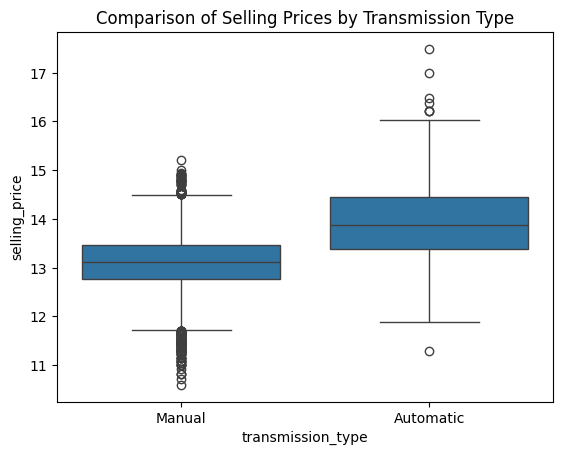

In [75]:
#lets see which transmission type costs more
sns.boxplot(data = car_data,
            x = 'transmission_type',
            y = 'selling_price')
plt.xticks([0,1], ['Manual','Automatic'])
plt.xlabel('transmission_type')
plt.title("Comparison of Selling Prices by Transmission Type")

#automtic cars costs more than manual

Text(0.5, 1.0, 'Selling Price vs Mileage by Transmission Type')

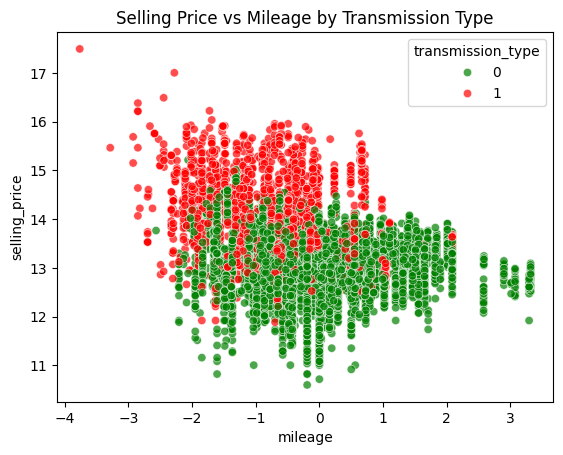

In [76]:
sns.scatterplot(data = car_data,
                x = 'mileage',
                y = 'selling_price',
                alpha = 0.7,
                hue='transmission_type',  # Color points by transmission type 
                palette={ 0: 'green', 1: 'red'})
plt.title("Selling Price vs Mileage by Transmission Type")
#where 0 = manual and 1 = automatic

Text(0.5, 1.0, 'Impact of Vehicle Age on Selling Price by Transmission Type')

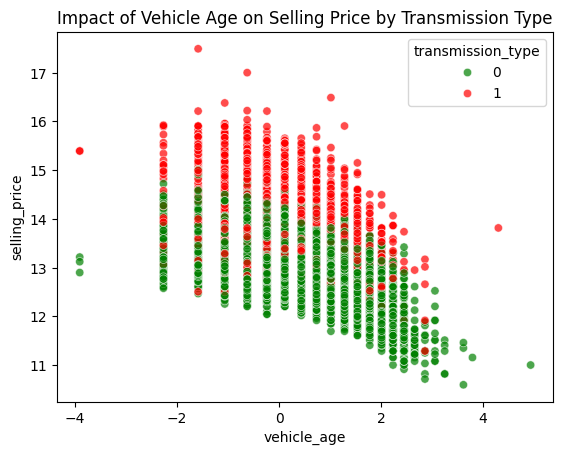

In [77]:
sns.scatterplot(data = car_data,
                x = 'vehicle_age',
                y = 'selling_price',
                alpha = 0.7,
                hue='transmission_type',  # Color points by smoker status
                palette={ 0: 'green', 1: 'red'})
plt.title("Impact of Vehicle Age on Selling Price by Transmission Type")


Text(0.5, 1.0, 'Effect of Kilometers Driven on Selling Price by Transmission Type')

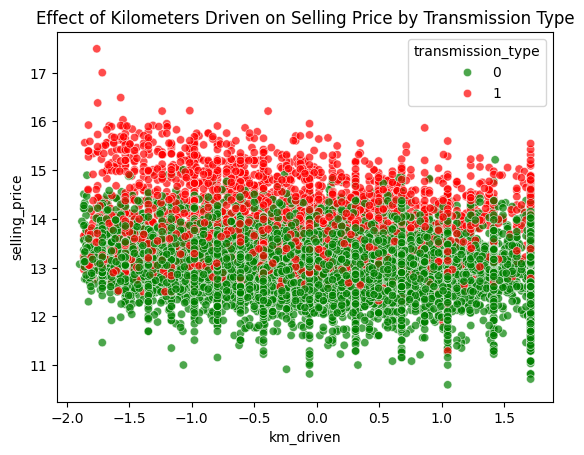

In [78]:
sns.scatterplot(data = car_data,
                x = 'km_driven',
                y = 'selling_price',
                alpha = 0.7,
                hue='transmission_type',  
                palette={ 0: 'green', 1: 'red'})
plt.title("Effect of Kilometers Driven on Selling Price by Transmission Type")


Text(0.5, 1.0, 'Relationship Between Engine Power and Selling Price by Transmission Type')

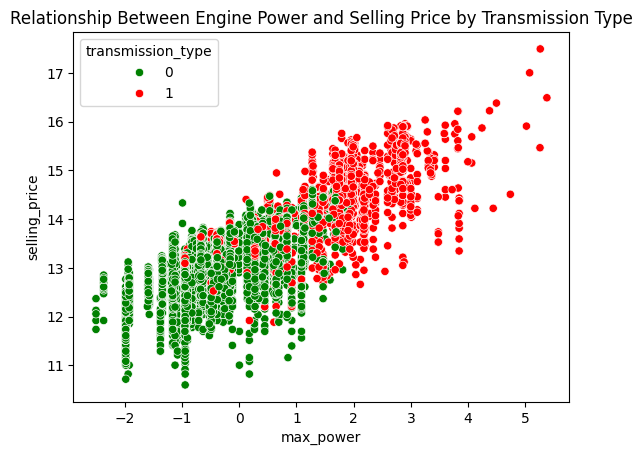

In [82]:
sns.scatterplot(data = car_data,
               x = 'max_power',
               y = 'selling_price',
               hue = 'transmission_type',
               palette={ 0: 'green', 1: 'red'})
plt.title("Relationship Between Engine Power and Selling Price by Transmission Type")

#as engine power increase price also increase, significant in automatic

In [81]:
all_correlations = car_data.select_dtypes(include='number').corr()
all_correlations

,vehicle_age,km_driven,transmission_type,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,power_engine_interaction,power_squared,engine_squared,vehicle_age_squared
vehicle_age,1.000000,0.562052,-0.082826,-0.238862,0.090378,-0.022409,0.033645,-0.466440,0.065436,-0.051963,-0.063530,-0.020181,0.040099,0.000425,0.081741,-0.043223,0.956821,-0.022739,0.090364,0.991825
km_driven,0.562052,1.000000,-0.109810,-0.104816,0.248612,0.077418,0.216582,-0.174713,-0.038738,0.056312,-0.079464,0.007952,0.366052,0.007754,0.041075,-0.372645,0.578324,0.077509,0.248615,0.578044
transmission_type,-0.082826,-0.109810,1.000000,-0.282738,0.338742,0.510710,-0.058527,0.499992,0.204218,-0.201867,-0.016373,-0.072053,0.032142,0.031563,-0.027317,-0.010281,-0.080127,0.510164,0.338730,-0.083055
mileage,-0.238862,-0.104816,-0.282738,1.000000,-0.620834,-0.547888,-0.440280,-0.301869,-0.079906,0.073703,0.030610,0.206865,0.082897,-0.002090,-0.023923,-0.137477,-0.185755,-0.547722,-0.620814,-0.218562
engine,0.090378,0.248612,0.338742,-0.620834,1.000000,0.834586,0.536828,0.674453,0.123517,-0.111466,-0.058607,-0.123450,0.544106,0.029700,-0.051242,-0.505068,0.095600,0.834647,1.000000,0.095518
max_power,-0.022409,0.077418,0.510710,-0.547888,0.834586,1.000000,0.215917,0.780637,0.193163,-0.185335,-0.041162,-0.157084,0.359835,0.023588,-0.067064,-0.309724,-0.012203,0.999997,0.834601,-0.016280
seats,0.033645,0.216582,-0.058527,-0.440280,0.536828,0.215917,1.000000,0.230034,-0.049431,0.057600,-0.036079,-0.001724,0.336285,-0.006494,-0.021566,-0.333076,0.034267,0.216067,0.536801,0.035038
selling_price,-0.466440,-0.174713,0.499992,-0.301869,0.674453,0.780637,0.230034,1.000000,0.179129,-0.176940,-0.014943,-0.085997,0.391297,0.027013,-0.087590,-0.358760,-0.405644,0.780546,0.674458,-0.443528
seller_type_Dealer,0.065436,-0.038738,0.204218,-0.079906,0.123517,0.193163,-0.049431,0.179129,1.000000,-0.976345,-0.135806,0.028666,0.025361,0.004347,-0.028134,-0.030416,0.093179,0.193147,0.123522,0.079866
seller_type_Individual,-0.051963,0.056312,-0.201867,0.073703,-0.111466,-0.185335,0.057600,-0.176940,-0.976345,1.000000,-0.081621,-0.041097,-0.006336,-0.003999,0.029547,0.014682,-0.080025,-0.185323,-0.111470,-0.066362


Text(0.5, 1.0, 'Correlation with Selling Price')

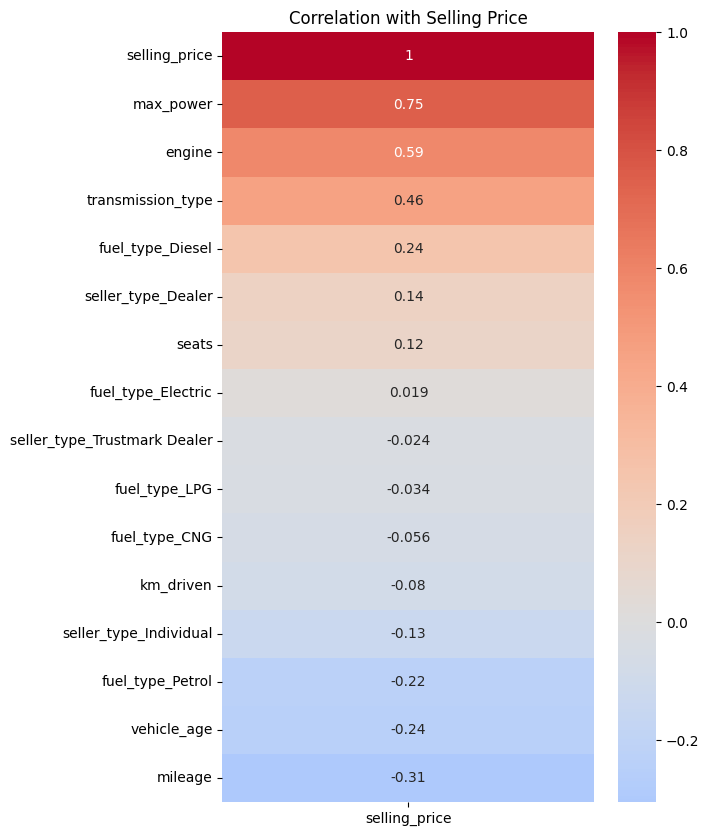

In [83]:
corr_with_target = mycorr[['selling_price']].sort_values('selling_price', ascending=False)

# Plot only correlations with the target
plt.figure(figsize=(6, 10))
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation with Selling Price")

## Optimizing Features: Merge Rare Values + Strategic Dropping

In [84]:
# Consolidate low-frequency and less correlated featues into a combined 'Others' category
car_data['fuel_type_others'] = car_data[['fuel_type_LPG', 'fuel_type_Electric', 'fuel_type_CNG']].max(axis=1)

In [85]:
car_data = car_data.drop(['fuel_type_LPG','fuel_type_Electric','fuel_type_CNG'], axis = 1)

In [86]:
#Drop 'seller_type_Trustmark Dealer' as it has low frequency and very less correlation with target
car_data = car_data.drop(['seller_type_Trustmark Dealer'], axis =1)
#Drop km_driven' as its scatter plot show noise and has low correlation with target
car_data = car_data.drop(['km_driven'], axis = 1)

In [88]:
sp = car_data['selling_price']
car_data = car_data.drop(['selling_price'], axis =1)
car_data['selling_price'] = sp

In [89]:
car_data.head()

,brand,model,vehicle_age,transmission_type,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,fuel_type_Diesel,fuel_type_Petrol,power_engine_interaction,power_squared,engine_squared,vehicle_age_squared,fuel_type_others,selling_price
0,Maruti,Alto,1.016907,0,-0.000276,-1.856392,-1.984711,5,0,1,0,1,0.935050,-1.993534,-1.856826,1.012061,0,11.695255
1,Hyundai,Grand,-0.236208,0,-0.192064,-0.535165,-0.382695,5,0,1,0,1,-0.006420,-0.381503,-0.535117,-0.134941,0,13.217675
2,Hyundai,i20,1.536283,0,-0.647562,-0.535165,-0.452183,5,0,1,0,1,1.214584,-0.451153,-0.535117,1.408802,0,12.278398
3,Maruti,Alto,1.016907,0,0.292201,-1.124059,-0.946385,5,0,1,0,1,0.935050,-0.947130,-1.124158,1.012061,0,12.328295
4,Ford,Ecosport,0.113878,0,0.735712,0.191477,0.136433,5,1,0,1,0,0.307395,0.138222,0.191586,0.217382,0,13.253393


## Target Encoding

In [92]:
X = car_data.drop(['selling_price'], axis = 1) #.values
y = car_data['selling_price'] #.values.reshape(-1)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [94]:
# Target Encoding Preparation
# Temporarily merge features (X_train) with target (y_train) to calculate target statistics
car_data_train = X_train.copy()
car_data_train['selling_price'] = y_train

In [95]:
#Compute Target Means on Train data Only
brand_mean = car_data_train.groupby('brand')['selling_price'].mean()
model_mean = car_data_train.groupby('model')['selling_price'].mean()


In [96]:
# Encode in train set
X_train['brand_target_enc'] = X_train['brand'].map(brand_mean)
X_train['model_target_enc'] = X_train['model'].map(model_mean)

# Encode in test set
X_test['brand_target_enc'] = X_test['brand'].map(brand_mean)
X_test['model_target_enc'] = X_test['model'].map(model_mean)


In [97]:
#Fill global mean in place of NaN 
global_mean = y_train.mean()

X_test['brand_target_enc'] = X_test['brand_target_enc'].fillna(global_mean)
X_test['model_target_enc'] = X_test['model_target_enc'].fillna(global_mean)

In [98]:
#drop orignal columns
X_train.drop(['brand', 'model'], axis=1, inplace=True)
X_test.drop(['brand', 'model'], axis=1, inplace=True)

In [99]:
#Scale these new formed features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['brand_target_enc', 'model_target_enc']] = scaler.fit_transform(X_train[['brand_target_enc', 'model_target_enc']])
X_test[['brand_target_enc', 'model_target_enc']] = scaler.transform(X_test[['brand_target_enc', 'model_target_enc']])


In [100]:
X_train.head()

,vehicle_age,transmission_type,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,fuel_type_Diesel,fuel_type_Petrol,power_engine_interaction,power_squared,engine_squared,vehicle_age_squared,fuel_type_others,brand_target_enc,model_target_enc
11210,0.435816,1,-2.038027,1.718669,2.342090,5,1,0,1,0,0.556773,2.337632,1.718573,0.518063,0,3.453515,1.776489
1347,-1.584337,0,0.992229,-0.529757,-0.314861,5,0,1,0,1,-1.936852,-0.313531,-0.529708,-1.781275,0,0.087580,-0.452280
10363,-1.584337,1,-0.168091,1.045846,2.669423,5,1,0,1,0,-1.936852,2.663189,1.045886,-1.781275,0,2.594684,2.576308
316,0.435816,0,-0.455773,0.189314,0.626904,5,1,0,0,1,0.556773,0.628388,0.189422,0.518063,0,-0.101375,-0.082060
10638,1.283100,0,0.157949,-0.535165,-0.491137,5,1,0,0,1,1.084146,-0.490206,-0.535117,1.220168,0,-0.302536,-1.347899


In [101]:
#converting back to numpy array 
X_train = X_train.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)

X_test = X_test.to_numpy()
y_test = y_test.to_numpy().reshape(-1, 1)

In [102]:
#m = num of rows, n = num of features(columns)
m,n = X_train.shape

## Training Linear Regression Model

In [104]:
#initialize weight and bais, w =>shape (n,1) => compatible for dot product with X_train (m, n)
w = np.zeros((n,1)) 
b = 0.0

In [105]:
#define hypothesis function => f = X*w + b
def predict(X_train, w, b):
    return np.dot(X_train, w) + b

In [106]:
#define cost fucntion 
def cost_function(m, w, b, X_train, y_train):
    y_pred = predict(X_train, w, b)
    error = y_pred - y_train
    return (1/(2*m))*np.sum(error**2)

In [107]:
#error-shape (m , 1) | X_train-shape (m, n) => transpose => (n, m) => now compatable for dot product with error
def compute_dw_db(m, w, b, X_train, y_train):
    y_pred = predict(X_train, w, b)
    error = y_pred - y_train
    dw = (1/m)*np.dot(X_train.T, error) #took transpose to match the shape,
    db = (1/m)*np.sum(error)
    return dw, db

In [108]:
X_train.shape #(m, n)

(12328, 17)

In [109]:
#define gradient descent function
def gradient_descent(w, b, X_train, y_train, epochs, alpha):
    cost_history = []
    for i in range(epochs):
        dw, db = compute_dw_db(m, w, b, X_train, y_train)
        w = w - alpha *dw
        b = b - alpha *db
        cost = cost_function(m, w, b, X_train, y_train)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f" iteration {i} : Cost : {cost}")

    return w , b , cost_history

In [110]:
#training, alpha => learning rate, epochs => no. of iteration
alpha = 0.01
epochs = 10000
w_final, b_final, cost_history = gradient_descent(w, b, X_train, y_train, epochs, alpha)

 iteration 0 : Cost : 42.915274686568125
 iteration 100 : Cost : 1.0166179827675952
 iteration 200 : Cost : 0.810494705848798
 iteration 300 : Cost : 0.717128659526213
 iteration 400 : Cost : 0.6663108926904419
 iteration 500 : Cost : 0.6326783143934034
 iteration 600 : Cost : 0.6066435142933344
 iteration 700 : Cost : 0.5843957521366006
 iteration 800 : Cost : 0.5643285293832481
 iteration 900 : Cost : 0.5457161206449305
 iteration 1000 : Cost : 0.5282028411093845
 iteration 1100 : Cost : 0.5115969442654452
 iteration 1200 : Cost : 0.4957834645821673
 iteration 1300 : Cost : 0.480685588114559
 iteration 1400 : Cost : 0.46624672897220903
 iteration 1500 : Cost : 0.45242183303326694
 iteration 1600 : Cost : 0.43917296443582404
 iteration 1700 : Cost : 0.42646695633179277
 iteration 1800 : Cost : 0.4142740928366662
 iteration 1900 : Cost : 0.40256732482236923
 iteration 2000 : Cost : 0.3913217727190956
 iteration 2100 : Cost : 0.3805143902103173
 iteration 2200 : Cost : 0.370123722446685

## Evaluation

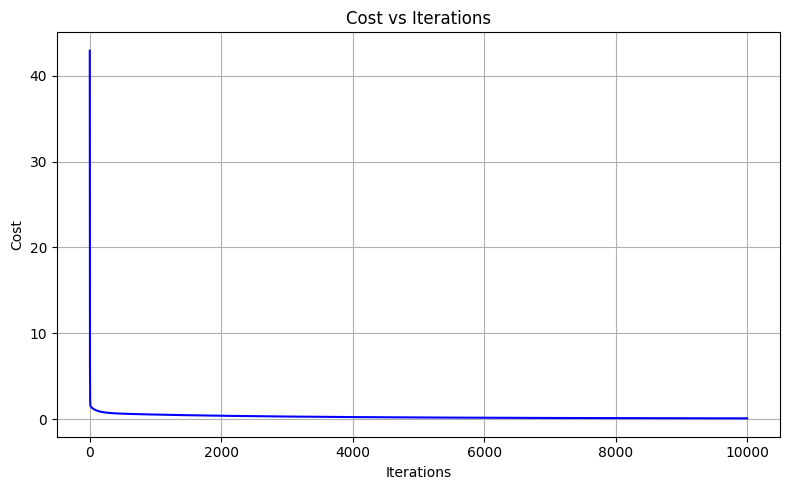

In [124]:
# Plot cost vs iteration
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.tight_layout()
plt.savefig('cost_vs_iterations.png')
#Cost is decreasing with no. kf itterations

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
y_train_pred = predict(X_train, w_final, b_final)

In [114]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
print("Train RMSE:", rmse_train)
print("Train R²:", r2_train)

Train RMSE: 0.4223106958226688
Train R²: 0.616161535738434


In [115]:
y_test_pred = predict(X_test, w_final, b_final)

In [116]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_train, y_train_pred)
print("Train RMSE:", rmse_test)
print("Train R²:", r2_test)

Train RMSE: 0.42914940402116725
Train R²: 0.616161535738434


In [117]:
y_train_pred = predict(X_train, w_final, b_final)

y_train_actual = np.expm1(y_train)
y_train_pred_actual = np.expm1(y_train_pred)

rmse_train = np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))
r2_train = r2_score(y_train_actual, y_train_pred_actual)

print("Train RMSE:", rmse_train)
print("Train R²:", r2_train)

Train RMSE: 606416.1363295192
Train R²: 0.5465785971761541


In [118]:
y_test_pred = predict(X_test, w_final, b_final)

y_test_actual = np.expm1(y_test)
y_test_pred_actual = np.expm1(y_test_pred)

rmse_test = np.sqrt(mean_squared_error(y_test_actual, y_test_pred_actual))
r2_test = r2_score(y_test_actual, y_test_pred_actual)

print("Test RMSE:", rmse_test)
print("Test R²:", r2_test)

Test RMSE: 616343.3626268256
Test R²: 0.495366193156321


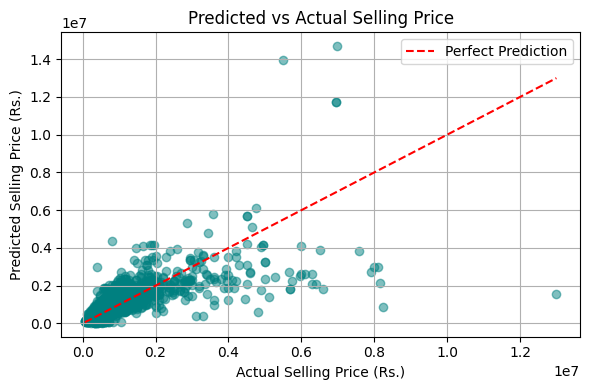

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(y_test_actual, y_test_pred_actual, alpha=0.5, color='teal')
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Selling Price (Rs.)')
plt.ylabel('Predicted Selling Price (Rs.)')
plt.title('Predicted vs Actual Selling Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('predicted_vs_actual.png')
plt.show()
